In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


train =pd.read_csv('../input/tanzania-tourism-prediction/Train.csv')
test = pd.read_csv('../input/tanzania-tourism-prediction/Test.csv')
sub =pd.read_csv('../input/tanzania-tourism-prediction/SampleSubmission.csv')

In [2]:
#filling in missing values 

train['travel_with'] = train['travel_with'].fillna(train['travel_with'].mode()[0])
test['travel_with'] = test['travel_with'].fillna(test['travel_with'].mode()[0])

train['total_female']=train['total_female'].fillna(train['total_female'].mode()[0])
test['total_female']=test['total_female'].fillna(test['total_female'].mode()[0])

train['total_male']=train['total_male'].fillna(train['total_male'].mode()[0])
test['total_male']=test['total_male'].fillna(test['total_male'].mode()[0])

train['most_impressing']=train['most_impressing'].fillna(train['most_impressing'].mode()[0])
test['most_impressing']=test['most_impressing'].fillna(test['most_impressing'].mode()[0])

In [3]:
import category_encoders as ce

In [4]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the comb
all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (6410, 23)


In [5]:
all_data['total_nights'] =all_data['night_zanzibar']+all_data['night_mainland']
all_data['total_people'] = all_data['total_male'] + all_data['total_female']

print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (6410, 25)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_data, all_data.total_cost, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((4487, 25), (1923, 25))

In [7]:
ord_enc = ce.OrdinalEncoder(cols=['country', 'age_group', 'travel_with', 'purpose', 
                                  'main_activity', 'info_source', 'tour_arrangement', 
                                  'package_transport_int', 'package_accomodation', 
                                  'package_food', 'package_transport_tz', 'package_sightseeing', 
                                  'package_guided_tour', 'package_insurance', 'payment_mode',
                                  'first_trip_tz', 'most_impressing']).fit(X_train,y_train)

In [8]:
all_data = ord_enc.transform(all_data)
all_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_nights,total_people
0,tour_0,26.0,2,3,1.0,1.0,2,2,1,1,...,1,1,13.0,0.0,1,1,1,674602.5,13.0,2.0
1,tour_10,11.0,1,1,1.0,0.0,2,5,3,1,...,1,1,14.0,7.0,1,2,5,3214906.5,21.0,1.0
2,tour_1000,11.0,1,1,0.0,1.0,3,5,1,1,...,1,1,1.0,31.0,1,1,6,3315000.0,32.0,1.0
3,tour_1002,11.0,1,2,1.0,1.0,2,2,2,2,...,2,1,11.0,0.0,1,2,1,7790250.0,11.0,2.0
4,tour_1004,32.0,4,1,1.0,0.0,2,2,2,1,...,1,1,7.0,4.0,1,2,4,1657500.0,11.0,1.0


In [9]:
main_cols = all_data.columns.difference(['ID', 'total_cost'])

In [10]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((4809, 25), (1601, 25))

In [11]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# Regression
from sklearn.linear_model import LinearRegression,Ridge,\
Lasso, Lars, LassoLars, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, RANSACRegressor,TheilSenRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,\
 ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor, StackingRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.pipeline import make_pipeline

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [12]:
# Select main columns to be used in training

X = train_df[main_cols]
y = train_df.total_cost

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [13]:
logreg = LinearRegression()
lgbmc = LGBMRegressor()
xgbc =XGBRegressor()
dtc =DecisionTreeRegressor()
etc = ExtraTreeRegressor()
rfc =RandomForestRegressor()
abc =AdaBoostRegressor()
gbc = GradientBoostingRegressor()
cbc = CatBoostRegressor()
sgd = SGDRegressor()
br = BayesianRidge()

ridge= Ridge()
lasso= Lasso()
lars = Lars()
lassolars= LassoLars()
elasticnet=  ElasticNet()
ard =ARDRegression()
passive= PassiveAggressiveRegressor()
hbr =HuberRegressor() 
ransc=RANSACRegressor()
theil =TheilSenRegressor()
kr = KernelRidge()

svrr=SVR()
nsvrr= NuSVR()
lsvr=LinearSVR()
knn=KNeighborsRegressor()
gpr =GaussianProcessRegressor()
estimators =[
             ('LInear Regression',logreg), ('LGBMRegressor',lgbmc), ('XGBRegressor',xgbc),('AdaBoostRegressor',abc),
             ('DecisionTreeRegressor',dtc), ('ExtraTreesRegressor',etc),('RandomForestRegressor',rfc),
             ('GradientBoostingRegressor',gbc), ('SGDRegressor',sgd), ('BayesianRidge',br),
             ('ridge',ridge),('lasso',lasso),('lars',lars),('LassoLars',lassolars),
             ('elasticnet',elasticnet),('ARD',ard),('Passive',passive),('HBR',hbr),
             ('Ransca',ransc),('TheilSen',theil),('KernelRidge',kr),
             ('SVR',svrr),('NuSVR',nsvrr),('KNN',knn),('LinearSVR',lsvr),
             ('KNN',knn),('GPR',gpr),('cbc',cbc)
]


def model_training(X_train,X_test,y_train,y_test):
    for e,r in estimators:
        r.fit(X_train,y_train)
        r_preds = r.predict(X_test)
        print("*****************************************************")
        print("F1 SCORE  for {} is >>>>    ".format(e),mae(y_test,r_preds))
        
        print("*****************************************************")
        print("\n")

        

model_training(X_train,X_test,y_train,y_test)

*****************************************************
F1 SCORE  for LInear Regression is >>>>     5719713.305079824
*****************************************************


*****************************************************
F1 SCORE  for LGBMRegressor is >>>>     5098409.534270405
*****************************************************


*****************************************************
F1 SCORE  for XGBRegressor is >>>>     5603307.007032961
*****************************************************


*****************************************************
F1 SCORE  for AdaBoostRegressor is >>>>     8825738.703070909
*****************************************************


*****************************************************
F1 SCORE  for DecisionTreeRegressor is >>>>     7030759.267568723
*****************************************************


*****************************************************
F1 SCORE  for ExtraTreesRegressor is >>>>     6962018.892587433
***************************

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=1.829e+02, with an active set of 21 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parame

*****************************************************
F1 SCORE  for LassoLars is >>>>     5719653.0128046665
*****************************************************




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e+16, tolerance: 5.174e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


*****************************************************
F1 SCORE  for elasticnet is >>>>     5724631.116867038
*****************************************************


*****************************************************
F1 SCORE  for ARD is >>>>     7874631.6621054495
*****************************************************




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


*****************************************************
F1 SCORE  for Passive is >>>>     5490454.374757635
*****************************************************


*****************************************************
F1 SCORE  for HBR is >>>>     5142351.836992228
*****************************************************


*****************************************************
F1 SCORE  for Ransca is >>>>     6564278.881187397
*****************************************************


*****************************************************
F1 SCORE  for TheilSen is >>>>     5534031.844530254
*****************************************************


*****************************************************
F1 SCORE  for KernelRidge is >>>>     6088708.001626467
*****************************************************


*****************************************************
F1 SCORE  for SVR is >>>>     6696453.808461507
*****************************************************


********************************

In [14]:
from sklearn.model_selection import KFold
test_df = test_df[main_cols]

folds = KFold(n_splits = 10)
feature_importance_df = pd.DataFrame()

predictions, predictions2 = [], []
test_preds, test_preds = [], []
y_preds, y_trues = [], []
rmses, rmses2 = [], []

for i,( train_index, test_index) in enumerate(folds.split(X, y)):
    X_tra, X_val, y_tra, y_val = X.loc[train_index], X.loc[test_index], y[train_index], y[test_index]


    lgbmc = LGBMRegressor()
    rf = RandomForestRegressor(n_estimators=1000, random_state=5050)
    lr = LinearRegression(normalize=True)
    xgbr = XGBRegressor(objective = 'reg:squarederror')
    hbr = HuberRegressor()

    estimators_1 = [('xgbrregressor', xgbr), ('lgbmregressor', lgbmc)]
    model = StackingRegressor(estimators=estimators_1, final_estimator=HuberRegressor() )
    model2 = VotingRegressor(estimators=[('xgbrregressor', xgbr), ('lgbmregressor', lgbmc)], weights=[0.55, 0.45])

    model.fit(X_tra, y_tra)
    model2.fit(X_tra, y_tra)

    preds = model.predict(test_df)
    preds2 = model2.predict(test_df)
    # test_pred = model.predict(X_test)
    # test_preds.append(test_pred)
    predictions.append(preds)
    predictions2.append(preds2)
    y_preds.extend(model.predict(X_val))
    y_trues.extend(y_val)
    rmse = mae(y_val, model.predict(X_val))
    rmses.append(rmse)

    rmse2 = mae(y_val, model2.predict(X_val))
    rmses2.append(rmse2)
    print(i, rmse, rmse2)

    # fold_importance_df = pd.DataFrame({'feature': X.columns.tolist(), 'importance': model.feature_importances_})
    # feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    

print(f'MAE:  {np.mean(rmses)}  {np.mean(rmse2)}  {(np.mean(rmses)+np.mean(rmse2))/2}')

0 4700425.673752079 5174814.189709423
1 6605109.426310679 7193837.11373865
2 5024095.839864666 5453398.328575715
3 5938727.8884291295 6053748.166550543
4 4510739.8026951775 4701709.162685673
5 5176240.3088962985 5454556.172139259
6 5545525.592667776 5874745.655455515
7 4507506.749347746 4524231.43385934
8 4424782.234086074 4699133.161868889
9 3071138.7539877365 3407552.585239819
MAE:  4950429.227003736  3407552.585239819  4178990.9061217774


In [15]:
# Make predictions in test set and prepare submission file
predzz = (np.mean(predictions, 0) *0.4 + np.mean(predictions2, 0)*0.6)
sub_file = sub.copy()
sub_file['total_cost'] = predzz
sub_file.to_csv('lgbmr.csv', index = False)

In [16]:
# using catboost
from catboost  import CatBoostRegressor,Pool

train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)

cbr_oo = CatBoostRegressor(verbose=False)

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
cbr_oo.grid_search(grid, train_dataset)


bestTest = 11263004.96
bestIteration = 99

0:	loss: 11263004.9559129	best: 11263004.9559129 (0)	total: 94.2ms	remaining: 8.95s

bestTest = 10861704.14
bestIteration = 99

1:	loss: 10861704.1425270	best: 10861704.1425270 (1)	total: 178ms	remaining: 8.37s

bestTest = 11275160.79
bestIteration = 99

2:	loss: 11275160.7863793	best: 10861704.1425270 (1)	total: 267ms	remaining: 8.26s

bestTest = 10893182.53
bestIteration = 99

3:	loss: 10893182.5266465	best: 10861704.1425270 (1)	total: 356ms	remaining: 8.2s

bestTest = 11268736.78
bestIteration = 99

4:	loss: 11268736.7764981	best: 10861704.1425270 (1)	total: 471ms	remaining: 8.57s

bestTest = 10896723.7
bestIteration = 98

5:	loss: 10896723.7011046	best: 10861704.1425270 (1)	total: 575ms	remaining: 8.62s

bestTest = 11261009.27
bestIteration = 99

6:	loss: 11261009.2673177	best: 10861704.1425270 (1)	total: 678ms	remaining: 8.62s

bestTest = 10897212.5
bestIteration = 98

7:	loss: 10897212.4982866	best: 10861704.1425270 (1)	total: 782ms	rem

{'params': {'depth': 8,
  'iterations': 150,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [17]:
pred =cbr_oo.predict(X_test)
print("F1 SCORE  CBR is >>>>    ",mae(y_test,pred))

F1 SCORE  CBR is >>>>     5003880.51824184


In [18]:
cbr_preds = cbr_oo.predict(test_df)

sub_file['total_cost'] = cbr_preds
sub_file.to_csv('fe_cbr.csv', index = False)

Text(0.5, 0, 'CatBoost Feature Importance')

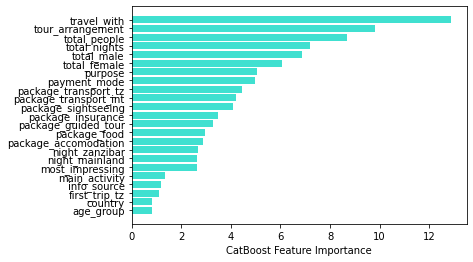

In [19]:
# feature importance for three models 
sorted_feature_importance = cbr_oo.feature_importances_.argsort()
plt.barh(X.columns, 
        cbr_oo.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Text(0.5, 0, 'XGBRegressor Feature Importance')

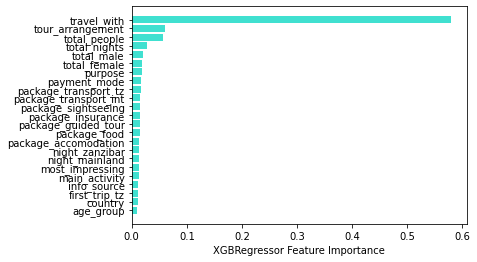

In [20]:
sorted_feature_importance = xgbc.feature_importances_.argsort()
plt.barh(X.columns, 
        xgbc.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("XGBRegressor Feature Importance")

In [21]:
lightgbr =LGBMRegressor()
lightgbr.fit(X_train,y_train)

LGBMRegressor()

Text(0.5, 0, 'LightGBMRegressor Feature Importance')

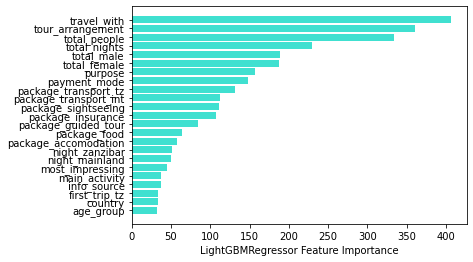

In [22]:
sorted_feature_importance = lightgbr.feature_importances_.argsort()
plt.barh(X.columns, 
        lightgbr.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("LightGBMRegressor Feature Importance")